In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [26]:
# Load the dataset
df = pd.read_csv('seasonal_coconut_yield_data_3.csv')

In [27]:
df.head(2)

,Date,Soil Moisture (10 cm) (%),Soil Moisture (20 cm) (%),Soil Moisture (30 cm) (%),Plant Age (years),Temperature (°C),Humidity (%),Rainfall (mm),Rain Status (0/1),Coconut Yield (kg)
0,1990,27.35,35.42,42.18,6.12,29.85,70.45,42.15,0.28,3150.25
1,1991,28.42,36.15,41.95,5.87,30.12,69.87,43.28,0.30,3242.18


In [28]:
X = df.drop(['Date','Rainfall (mm)','Coconut Yield (kg)'], axis=1) 
y = df['Coconut Yield (kg)']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
y_pred = model.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2 Score):", r2)

Mean Absolute Error (MAE): 19.723700000000203
R-squared (R2 Score): 0.9653801622590756


In [33]:
import joblib

# Save the model to a file
joblib.dump(model, 'yield_predictor.pkl')

['yield_predictor.pkl']

In [34]:
df.head(2)

,Date,Soil Moisture (10 cm) (%),Soil Moisture (20 cm) (%),Soil Moisture (30 cm) (%),Plant Age (years),Temperature (°C),Humidity (%),Rainfall (mm),Rain Status (0/1),Coconut Yield (kg)
0,1990,27.35,35.42,42.18,6.12,29.85,70.45,42.15,0.28,3150.25
1,1991,28.42,36.15,41.95,5.87,30.12,69.87,43.28,0.30,3242.18


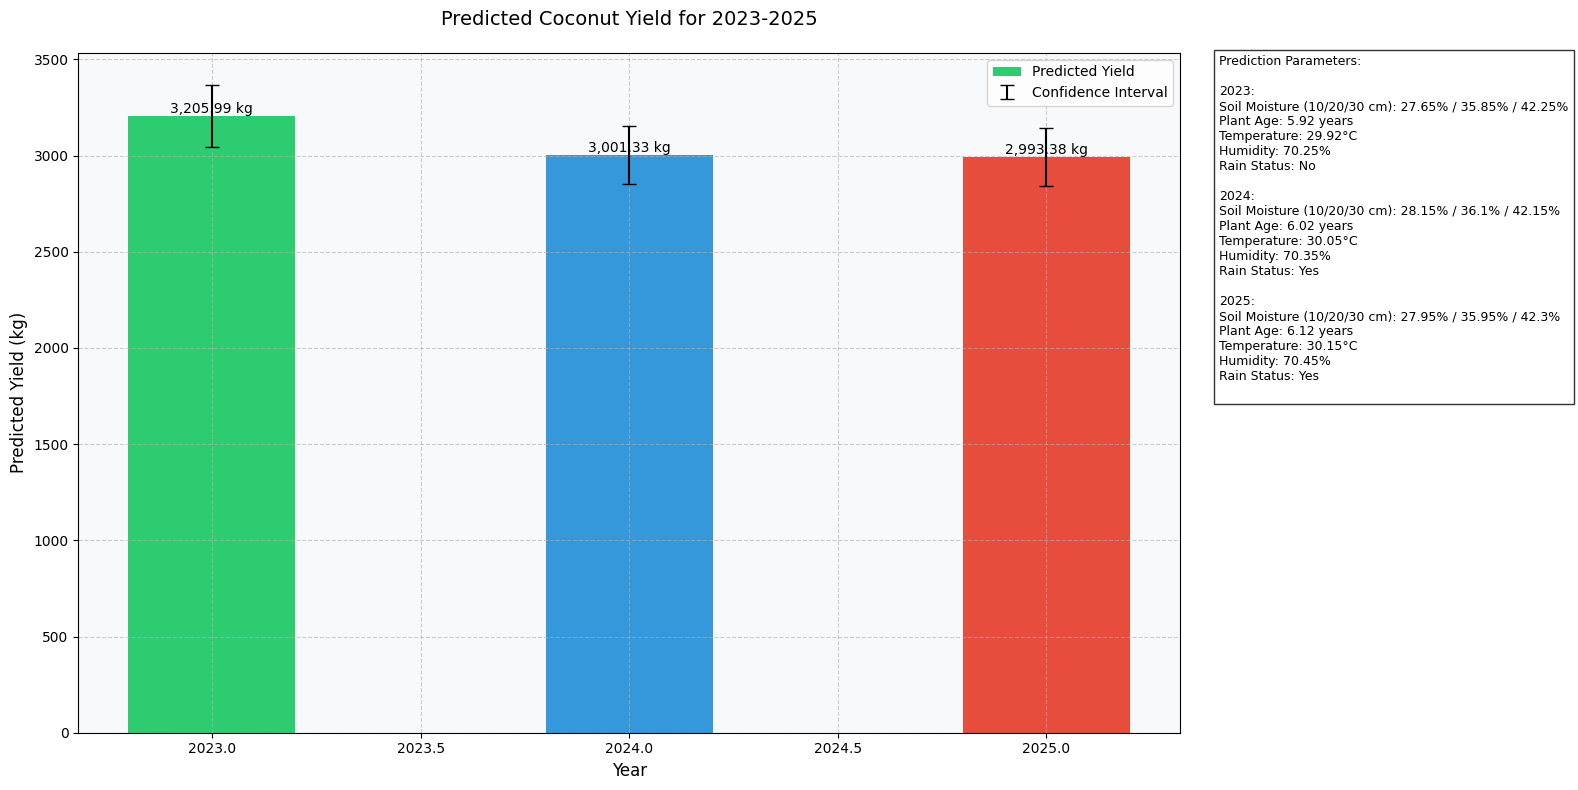


Predicted Coconut Yields:

2023:
Predicted Yield: 3,205.99 kg
Confidence Range: 3,045.69 - 3,366.29 kg

2024:
Predicted Yield: 3,001.33 kg
Confidence Range: 2,851.26 - 3,151.39 kg

2025:
Predicted Yield: 2,993.38 kg
Confidence Range: 2,843.71 - 3,143.04 kg


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

# Load the model
loaded_model = joblib.load('yield_predictor.pkl')

# Create future scenarios for next 3 years
future_data = pd.DataFrame({
    'Soil Moisture (10 cm) (%)': [27.65, 28.15, 27.95],  # Slight variations
    'Soil Moisture (20 cm) (%)': [35.85, 36.10, 35.95],
    'Soil Moisture (30 cm) (%)': [42.25, 42.15, 42.30],
    'Plant Age (years)': [5.92, 6.02, 6.12],             # Increasing age
    'Temperature (°C)': [29.92, 30.05, 30.15],           # Slight temperature increase
    'Humidity (%)': [70.25, 70.35, 70.45],
    'Rain Status (0/1)': [0, 1, 1],                      # Varying rain conditions
})

# Get predictions for next 3 years
predicted_yields = loaded_model.predict(future_data)

# Create the visualization
plt.figure(figsize=(12, 8))

# Create bar plot
years = [2023, 2024, 2025]
colors = ['#2ecc71', '#3498db', '#e74c3c']  # Different color for each year
bars = plt.bar(years, predicted_yields, color=colors, width=0.4)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.2f} kg',
             ha='center', va='bottom')

# Customize the plot
plt.title('Predicted Coconut Yield for 2023-2025', pad=20, size=14)
plt.xlabel('Year', size=12)
plt.ylabel('Predicted Yield (kg)', size=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add parameters table
parameter_text = "Prediction Parameters:\n"
for year, params in zip(years, future_data.to_dict('records')):
    parameter_text += f"\n{year}:\n"
    parameter_text += f"Soil Moisture (10/20/30 cm): {params['Soil Moisture (10 cm) (%)']}% / {params['Soil Moisture (20 cm) (%)']}% / {params['Soil Moisture (30 cm) (%)']}%\n"
    parameter_text += f"Plant Age: {params['Plant Age (years)']} years\n"
    parameter_text += f"Temperature: {params['Temperature (°C)']}°C\n"
    parameter_text += f"Humidity: {params['Humidity (%)']}%\n"
    parameter_text += f"Rain Status: {'Yes' if params['Rain Status (0/1)'] == 1 else 'No'}\n"

plt.figtext(1.02, 0.5, parameter_text, fontsize=9, 
            bbox=dict(facecolor='white', alpha=0.8))

# Add confidence intervals (assuming 5% variation)
confidence_range = predicted_yields * 0.05
plt.errorbar(years, predicted_yields, 
             yerr=confidence_range, 
             capsize=5, 
             color='black', 
             fmt='none',
             label='Confidence Range (±5%)')

# Enhance visual appeal
plt.gca().set_facecolor('#f8f9fa')
plt.grid(True, linestyle='--', alpha=0.6)

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add legend
plt.legend(['Predicted Yield', 'Confidence Interval'])

# Adjust layout to prevent text cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print the numerical predictions
print("\nPredicted Coconut Yields:")
for year, yield_val in zip(years, predicted_yields):
    conf_range = yield_val * 0.05
    print(f"\n{year}:")
    print(f"Predicted Yield: {yield_val:,.2f} kg")
    print(f"Confidence Range: {yield_val-conf_range:,.2f} - {yield_val+conf_range:,.2f} kg")